In [77]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import datetime as dt
from itertools import product
from sklearn.metrics import mean_squared_error, mean_absolute_error
import plotly.express as px
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [78]:
df = pd.read_csv('/content/Data Corona Jakarta.csv')

In [79]:

df.head(5)

,Wilayah,Bulan,SUSPEK,Perawatan RS,Isolasi di Rumah,Suspek Meninggal,Selesai Isolasi,PROBABLE,Perawatan RS.1,Isolasi di Rumah.1,...,Selesai Isolasi.3,DISCARDED,Isolasi di Rumah.4,Meninggal,Selesai Isolasi.4,POSITIF,Dirawat,Sembuh,Meninggal.1,Self Isolation
0,Jakarta,Januari,6525129,22,215918,2311,6306878,33898,26,0,...,1865263,22593,0,1,22592,0,0,0,0,0
1,Jakarta,Februari,7288218,46,281097,2311,7004764,34033,37,0,...,1917563,22749,0,1,22748,0,0,0,0,0
2,Jakarta,Maret,7685025,36,124423,2311,7558255,34130,30,0,...,1936057,22920,0,1,22919,0,0,0,0,0
3,Jakarta,April,7905510,21,87493,2311,7815685,34228,42,0,...,1940884,22952,0,1,22951,0,0,0,0,0
4,Jakarta,Mei,8138149,29,87071,2311,8048738,34369,60,0,...,1943011,22970,0,1,22969,0,0,0,0,0


# Data Prepocesing


In [80]:
country_sorted = list(df['Wilayah'].unique())
country_sorted.sort()
print(country_sorted)

['Jakarta']


In [81]:

df.to_csv("procesing-covid_19_data.csv", index=False)

# Modeling

In [82]:
data= pd.read_csv("/content/procesing-covid_19_data.csv")

In [83]:
data['Wilayah'].value_counts()

Jakarta    6
Name: Wilayah, dtype: int64

In [84]:
data_from_rus = data[data['Wilayah'].isin(['Jakarta'])]
data_from_rus

,Wilayah,Bulan,SUSPEK,Perawatan RS,Isolasi di Rumah,Suspek Meninggal,Selesai Isolasi,PROBABLE,Perawatan RS.1,Isolasi di Rumah.1,...,Selesai Isolasi.3,DISCARDED,Isolasi di Rumah.4,Meninggal,Selesai Isolasi.4,POSITIF,Dirawat,Sembuh,Meninggal.1,Self Isolation
0,Jakarta,Januari,6525129,22,215918,2311,6306878,33898,26,0,...,1865263,22593,0,1,22592,0,0,0,0,0
1,Jakarta,Februari,7288218,46,281097,2311,7004764,34033,37,0,...,1917563,22749,0,1,22748,0,0,0,0,0
2,Jakarta,Maret,7685025,36,124423,2311,7558255,34130,30,0,...,1936057,22920,0,1,22919,0,0,0,0,0
3,Jakarta,April,7905510,21,87493,2311,7815685,34228,42,0,...,1940884,22952,0,1,22951,0,0,0,0,0
4,Jakarta,Mei,8138149,29,87071,2311,8048738,34369,60,0,...,1943011,22970,0,1,22969,0,0,0,0,0
5,Jakarta,Juni,8346952,23,98719,2311,8245899,34506,61,0,...,1946544,23126,0,1,23125,0,0,0,0,0


In [85]:
data1 = data_from_rus.groupby('Bulan').sum()['SUSPEK']
data1

Bulan
April       7905510
Februari    7288218
Januari     6525129
Juni        8346952
Maret       7685025
Mei         8138149
Name: SUSPEK, dtype: int64

In [86]:
data1.sort_values()

Bulan
Januari     6525129
Februari    7288218
Maret       7685025
April       7905510
Mei         8138149
Juni        8346952
Name: SUSPEK, dtype: int64

In [87]:
df1 = np.array(data1.sort_values())
df1[:10]

array([6525129, 7288218, 7685025, 7905510, 8138149, 8346952])

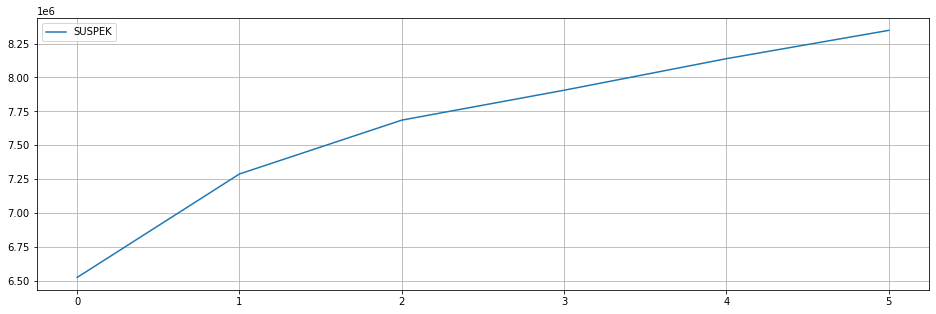

In [88]:
data_from_rus['SUSPEK'].plot( figsize = (16,5))

plt.legend()
plt.grid('On')
plt.show()

In [89]:
#normalize data

scaler = StandardScaler()
dataset = scaler.fit_transform(df1.reshape(-1, 1))
dataset[0][:10]

array([-1.86024369])

In [90]:
from sklearn.model_selection import train_test_split
X = pd.get_dummies(df.drop(['Sembuh', 'Perawatan RS.2', 'Isolasi di Rumah.1'], axis=1))
y = df['Isolasi di Rumah.1'].apply(lambda x: 1 if x=='Yes' else 0 )

In [91]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size =.1)

In [92]:
X_train.head()

,SUSPEK,Perawatan RS,Isolasi di Rumah,Suspek Meninggal,Selesai Isolasi,PROBABLE,Perawatan RS.1,Probable Meninggal,Selesai Isolasi.1,PELAKU PERJALANAN,...,Dirawat,Meninggal.1,Self Isolation,Wilayah_Jakarta,Bulan_April,Bulan_Februari,Bulan_Januari,Bulan_Juni,Bulan_Maret,Bulan_Mei
5,8346952,23,98719,2311,8245899,34506,61,22732,11713,2617334,...,0,0,0,1,0,0,0,1,0,0
1,7288218,46,281097,2311,7004764,34033,37,22732,11264,1821329,...,0,0,0,1,0,1,0,0,0,0
0,6525129,22,215918,2311,6306878,33898,26,22727,11145,1292333,...,0,0,0,1,0,0,1,0,0,0
3,7905510,21,87493,2311,7815685,34228,42,22732,11454,2309500,...,0,0,0,1,1,0,0,0,0,0
2,7685025,36,124423,2311,7558255,34130,30,22732,11368,2118298,...,0,0,0,1,0,0,0,0,1,0


In [93]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

In [94]:
model = Sequential()
model.add(Dense(units=6, activation="relu",input_dim=len(X_train.columns)))
model.add(Dense(units=3, activation="softmax"))
model.add(Dense(units=1, activation="sigmoid"))

In [95]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics="accuracy")

In [96]:

model.fit(X_train,y_train, epochs=20, batch_size = 2)

Epoch 1/20
3/3 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 2/20
3/3 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 3/20
3/3 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 4/20
3/3 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 5/20
3/3 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 6/20
3/3 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 7/20
3/3 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 8/20
3/3 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 9/20
3/3 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 10/20
3/3 [==============================] - 0s 4ms/step -

# SUSPEK

In [97]:
import plotly.graph_objects as go
grouped_multiple = df.groupby(['Bulan']).agg({'SUSPEK': ['sum']})
grouped_multiple.columns = ['PROBABLE']
grouped_multiple = grouped_multiple.reset_index()
fig = go.Figure()
fig.update_layout(template='plotly_dark')
fig.add_trace(go.Scatter(x=grouped_multiple['Bulan'], 
                         y=grouped_multiple['PROBABLE'],
                         mode='lines+markers',
                         name='Deaths',
                         line=dict(color='orange', width=2)))
fig.show()



**Suspek MENINGGAL**

In [98]:
import plotly.graph_objects as go
grouped_multiple = df.groupby(['Bulan']).agg({'Suspek Meninggal': ['sum']})
grouped_multiple.columns = ['PROBABLE']
grouped_multiple = grouped_multiple.reset_index()
fig = go.Figure()
fig.update_layout(template='plotly_dark')
fig.add_trace(go.Scatter(x=grouped_multiple['Bulan'], 
                         y=grouped_multiple['PROBABLE'],
                         mode='lines+markers',
                         name='Deaths',
                         line=dict(color='orange', width=2)))
fig.show()



**Pasien Sembuh**

In [99]:
import plotly.graph_objects as go
grouped_multiple = df.groupby(['Bulan']).agg({'Selesai Isolasi': ['sum']})
grouped_multiple.columns = ['PROBABLE']
grouped_multiple = grouped_multiple.reset_index()
fig = go.Figure()
fig.update_layout(template='plotly_dark')
fig.add_trace(go.Scatter(x=grouped_multiple['Bulan'], 
                         y=grouped_multiple['PROBABLE'],
                         mode='lines+markers',
                         name='Deaths',
                         line=dict(color='orange', width=2)))
fig.show()

# MOBILITY

In [100]:
mb = pd.read_csv('/content/Data Mobilitas Jakarta.csv')

In [101]:
mb.head()

,sub_region_1,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,Jakarta,2022-01-01,-18,1,-16,-29,-50,5
1,Jakarta,2022-01-02,-7,15,-23,-16,-9,2
2,Jakarta,2022-01-03,-7,18,-17,-23,-22,6
3,Jakarta,2022-01-04,-8,16,-17,-22,-20,6
4,Jakarta,2022-01-05,-9,11,-17,-21,-18,6


In [102]:
mb['month'] = pd.DatetimeIndex(mb['date']).month

In [103]:
mb1 = mb[['sub_region_1','month','retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline','parks_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline','workplaces_percent_change_from_baseline','residential_percent_change_from_baseline' ]]

In [104]:
mb1.shape

(181, 8)

In [105]:
mb2 = mb1.dropna(subset=['sub_region_1'])

In [106]:
mb2.head()

,sub_region_1,month,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,Jakarta,1,-18,1,-16,-29,-50,5
1,Jakarta,1,-7,15,-23,-16,-9,2
2,Jakarta,1,-7,18,-17,-23,-22,6
3,Jakarta,1,-8,16,-17,-22,-20,6
4,Jakarta,1,-9,11,-17,-21,-18,6


In [107]:
mb3 = mb2.groupby(['month','sub_region_1']).mean()

In [108]:
mb3.head(50).sort_values(by="month")

,,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
month,sub_region_1,,,,,,
1,Jakarta,-8.419355,12.290323,-14.903226,-22.677419,-13.870968,6.193548
2,Jakarta,-17.607143,6.642857,-19.285714,-36.642857,-23.642857,11.464286
3,Jakarta,-17.322581,1.032258,-18.870968,-30.483871,-14.516129,9.225806
4,Jakarta,-16.200000,2.233333,-26.366667,-28.100000,-14.966667,9.900000
5,Jakarta,-16.290323,-2.451613,-6.064516,-29.903226,-27.870968,7.838710
6,Jakarta,-11.233333,4.333333,0.666667,-24.566667,-12.133333,7.733333


In [109]:
jt = mb2[mb2['sub_region_1'] == 'Jakarta']

In [110]:
jt

,sub_region_1,month,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,Jakarta,1,-18,1,-16,-29,-50,5
1,Jakarta,1,-7,15,-23,-16,-9,2
2,Jakarta,1,-7,18,-17,-23,-22,6
3,Jakarta,1,-8,16,-17,-22,-20,6
4,Jakarta,1,-9,11,-17,-21,-18,6
...,...,...,...,...,...,...,...,...
176,Jakarta,6,-9,4,10,-14,0,5
177,Jakarta,6,-12,2,-5,-25,-18,9
178,Jakarta,6,-13,3,-1,-25,-19,9
179,Jakarta,6,-10,5,0,-24,-18,8


In [111]:
jt = jt.drop(columns=['sub_region_1'])
jt = jt.set_index('month')
jt

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
month,,,,,,
1,-18,1,-16,-29,-50,5
1,-7,15,-23,-16,-9,2
1,-7,18,-17,-23,-22,6
1,-8,16,-17,-22,-20,6
1,-9,11,-17,-21,-18,6
...,...,...,...,...,...,...
6,-9,4,10,-14,0,5
6,-12,2,-5,-25,-18,9
6,-13,3,-1,-25,-19,9


In [112]:
valid_markers = ([item[0] for item in mpl.markers.MarkerStyle.markers.items() if
item[1] is not 'nothing' and not item[1].startswith('tick') and not item[1].startswith('caret')])

markers = np.random.choice(valid_markers, jt.shape[1], replace=False)

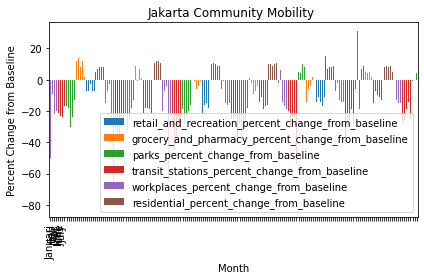

In [113]:
ax = jt.plot(kind='bar')
for i, line in enumerate(ax.get_lines()):
    line.set_marker(markers[i])

# adding legend
ax.legend(jt.columns, loc='best')
plt.ylabel('Percent Change from Baseline')
plt.xlabel('Month')
plt.title('Jakarta Community Mobility ')
labels = ['Januari','Feb', 'Mar', 'Apr', 'May', 'June','July']
ax.set_xticklabels(labels)
plt.tight_layout()
plt.savefig('jt.png')
plt.show()

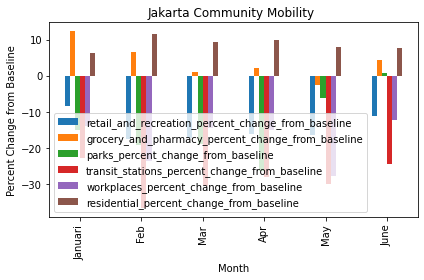

In [114]:
jkt = mb2[mb2['sub_region_1'] == 'Jakarta']
jkt = jkt.groupby(['month','sub_region_1']).mean().reset_index()
jkt = jkt.drop(columns=['sub_region_1'])
jkt = jkt.set_index('month')

# create valid markers from mpl.markers
valid_markers = ([item[0] for item in mpl.markers.MarkerStyle.markers.items() if
item[1] is not 'nothing' and not item[1].startswith('tick') and not item[1].startswith('caret')])
 
# valid_markers = mpl.markers.MarkerStyle.filled_markers
 
markers = np.random.choice(valid_markers, jkt.shape[1], replace=False)

ax = jkt.plot(kind='bar')
for i, line in enumerate(ax.get_lines()):
    line.set_marker(markers[i])

# adding legend
ax.legend(jkt.columns, loc='best')
plt.ylabel('Percent Change from Baseline')
plt.xlabel('Month')
plt.title('Jakarta Community Mobility ')
labels = ['Januari','Feb', 'Mar', 'Apr', 'May', 'June','July']
ax.set_xticklabels(labels)
plt.tight_layout()
plt.savefig('jkt.png')
plt.show()

# Kesimpulan

Dalam program ini menggunakan dataset terinfeksi covid 19 dan mobility dari wilayah Jakarta dengan data dari bulan Januari sampai Juni. Data tertinggi yang terinfeksi covid 19 berada pada grafik bulan juni dengan nilai 8346952 dan terendah pada grafik bulan Januari dengan nilai 6525129. Untuk data mobility pada grafik semuanya mengalami data rendah dengan presentasi minus kecuali data residential yang tidak pernah mengalami data rendah. 
1. Pada bulan Januari data grocery and pharmacy memiliki data tertinggi dan merupakan awal dari meningkatnya terinfeksi covid 19 sehingga banyak orang membeli kebutuhan sehari-hari dan perlengkapan kesehatan seperti masker dan hand sanitizer untuk persiapan pandemi.
2. Pada bulan Februari data residential mengalami kenaikan sehingga diposisi tertinggi, karena semua orang mengurangi aktivitas diluar rumah dan lebih banyak melakukan aktivitas di dalam rumah untuk menghindari terinfeksi dari covid 19, sedangkan data grocery and pharmachy mengalami penurunan karena sebagian besar masyarakat telah membeli dengan jumlah besar untuk simpanan.
3. Pada bulan Maret data residential masih diposisi tertinggi tetapi mengalami penurunan, sedangkan grocery and pharmacy mengalami penurunan yang sangat drastis karena grafik terinfeksi covid 19 semakin tinggi dengan peningkatan nilai 396802 dari bulan sebelumnya, jadi banyak orang mengurangi kegiatan di tempat yang ramai.
4. Pada bulan April residential masih diposisi tertinggi, sedangkan grocery and pharmacy mengalami sedikit kenaikan. Data terinfeksi covid 19 di bulan April mengalami kenaikan lebih sedikit dari bulan Maret dengan nilai 220485.
5. Pada bulan Mei residential masih diposisi tertinggi tetapi mengalami penurunan dan grafik dari data lainnya di posisi data rendah atau minus, data terinfeksi covid 19 di bulan ini mengalami kenaikan lebih banyak dari bulan April dengan nilai 232639 dan semua kegiatan masih dilakukan di dalam rumah karena mengalami pandemi.
6. Pada bulan Juni grafik residential masih tetap di posisi tertinggi, sedangkan grafik data terinfeksi covid 19 masih mengalami kenaikan tetapi lebih rendah dari bulan sebelumnya dan dibulan Juni merupakan kenaikan terinfeksi covid 19 terrendah dengan nilai kenaikan 208803. Hal tersebut memicu masyarakat berani melakukan kegiatan di luar rumah sehingga data grocery and pharmacy dan data parks mengalami kenaikan.
Dari semua data hanya grafik data residential yang stabil setiap bulannya.

# **Daftar Pustaka**

data mobility = [https://www.google.com/covid19/mobility](https://www.google.com/covid19/mobility)

Dataset covid = [https://riwayat-file-covid-19-dki-jakarta-jakartagis.hub.arcgis.com](https://riwayat-file-covid-19-dki-jakarta-jakartagis.hub.arcgis.com)
